# Exploratory Data Analysis on Online Shopping Sales Data

## Project Overview
This project demonstrates comprehensive exploratory data analysis techniques on online shopping sales data. The analysis covers data cleaning, visualization, statistical analysis, and insights generation.

## Learning Objectives
- Understand the structure and quality of e-commerce data
- Apply various data visualization techniques
- Identify patterns, trends, and outliers
- Generate actionable business insights
- Practice data cleaning and preprocessing

## Dataset Information
- **Source**: Sample e-commerce sales data (dummy data)
- **Records**: 50 sales transactions
- **Time Period**: January 2023 - March 2023
- **Variables**: 15 columns including customer demographics, product information, sales metrics

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}") 
print(f"Seaborn version: {sns.__version__}")

Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 2.1.3
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


## 1. Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('ecommerce_sales_data.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (50, 15)

Column Names:
['order_id', 'customer_id', 'product_name', 'category', 'price', 'quantity', 'total_amount', 'order_date', 'customer_age', 'customer_gender', 'customer_location', 'payment_method', 'shipping_method', 'product_rating', 'sales_rep']

First 5 rows:


,order_id,customer_id,product_name,category,price,quantity,total_amount,order_date,customer_age,customer_gender,customer_location,payment_method,shipping_method,product_rating,sales_rep
0,1001,C001,Wireless Headphones,Electronics,89.99,2,179.98,2023-01-15,28,Male,New York,Credit Card,Standard,4.5,John Smith
1,1002,C002,Running Shoes,Sports,129.99,1,129.99,2023-01-16,34,Female,California,PayPal,Express,4.2,Sarah Johnson
2,1003,C003,Coffee Maker,Home & Kitchen,199.99,1,199.99,2023-01-17,45,Male,Texas,Debit Card,Standard,4.8,Mike Davis
3,1004,C004,Smartphone Case,Electronics,24.99,3,74.97,2023-01-18,25,Female,Florida,Credit Card,Express,4.1,Emily Wilson
4,1005,C005,Yoga Mat,Sports,39.99,1,39.99,2023-01-19,32,Female,Washington,PayPal,Standard,4.6,David Brown


In [3]:
# Data types and basic information
print("Data Types:")
print(df.dtypes)
print("\nDataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
df.describe()

Data Types:
order_id               int64
customer_id           object
product_name          object
category              object
price                float64
quantity               int64
total_amount         float64
order_date            object
customer_age           int64
customer_gender       object
customer_location     object
payment_method        object
shipping_method       object
product_rating       float64
sales_rep             object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           50 non-null     int64  
 1   customer_id        50 non-null     object 
 2   product_name       50 non-null     object 
 3   category           50 non-null     object 
 4   price              50 non-null     float64
 5   quantity           50 non-null     int64  
 6   total_amount       50 non-null  

,order_id,price,quantity,total_amount,customer_age,product_rating
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1025.50000,120.510000,1.520000,133.024800,31.060000,4.486000
std,14.57738,139.709939,1.403203,134.979741,5.687114,0.243285
min,1001.00000,2.990000,1.000000,24.990000,22.000000,4.100000
25%,1013.25000,42.490000,1.000000,71.235000,27.000000,4.300000
50%,1025.50000,84.990000,1.000000,89.990000,30.000000,4.500000
75%,1037.75000,149.990000,1.750000,157.482500,34.000000,4.700000
max,1050.00000,899.990000,10.000000,899.990000,45.000000,4.900000


## 2. Data Cleaning and Preprocessing

In [4]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract additional date features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['weekday'] = df['order_date'].dt.day_name()

# Check for duplicate orders
print("Duplicate orders:", df.duplicated().sum())

# Check for outliers in numerical columns
numerical_cols = ['price', 'quantity', 'total_amount', 'customer_age', 'product_rating']
print("\nOutlier detection (values beyond 3 standard deviations):")
for col in numerical_cols:
    mean_val = df[col].mean()
    std_val = df[col].std()
    outliers = df[(df[col] < mean_val - 3*std_val) | (df[col] > mean_val + 3*std_val)]
    print(f"{col}: {len(outliers)} outliers")

# Data validation
print("\nData validation:")
print(f"Negative prices: {(df['price'] < 0).sum()}")
print(f"Negative quantities: {(df['quantity'] < 0).sum()}")
print(f"Invalid ratings (outside 1-5): {((df['product_rating'] < 1) | (df['product_rating'] > 5)).sum()}")
print(f"Age validation (18-100): {((df['customer_age'] < 18) | (df['customer_age'] > 100)).sum()}")

print("\nData cleaning completed successfully!")

Duplicate orders: 0

Outlier detection (values beyond 3 standard deviations):
price: 1 outliers
quantity: 1 outliers
total_amount: 1 outliers
customer_age: 0 outliers
product_rating: 0 outliers

Data validation:
Negative prices: 0
Negative quantities: 0
Invalid ratings (outside 1-5): 0
Age validation (18-100): 0

Data cleaning completed successfully!


## 3. Univariate Analysis

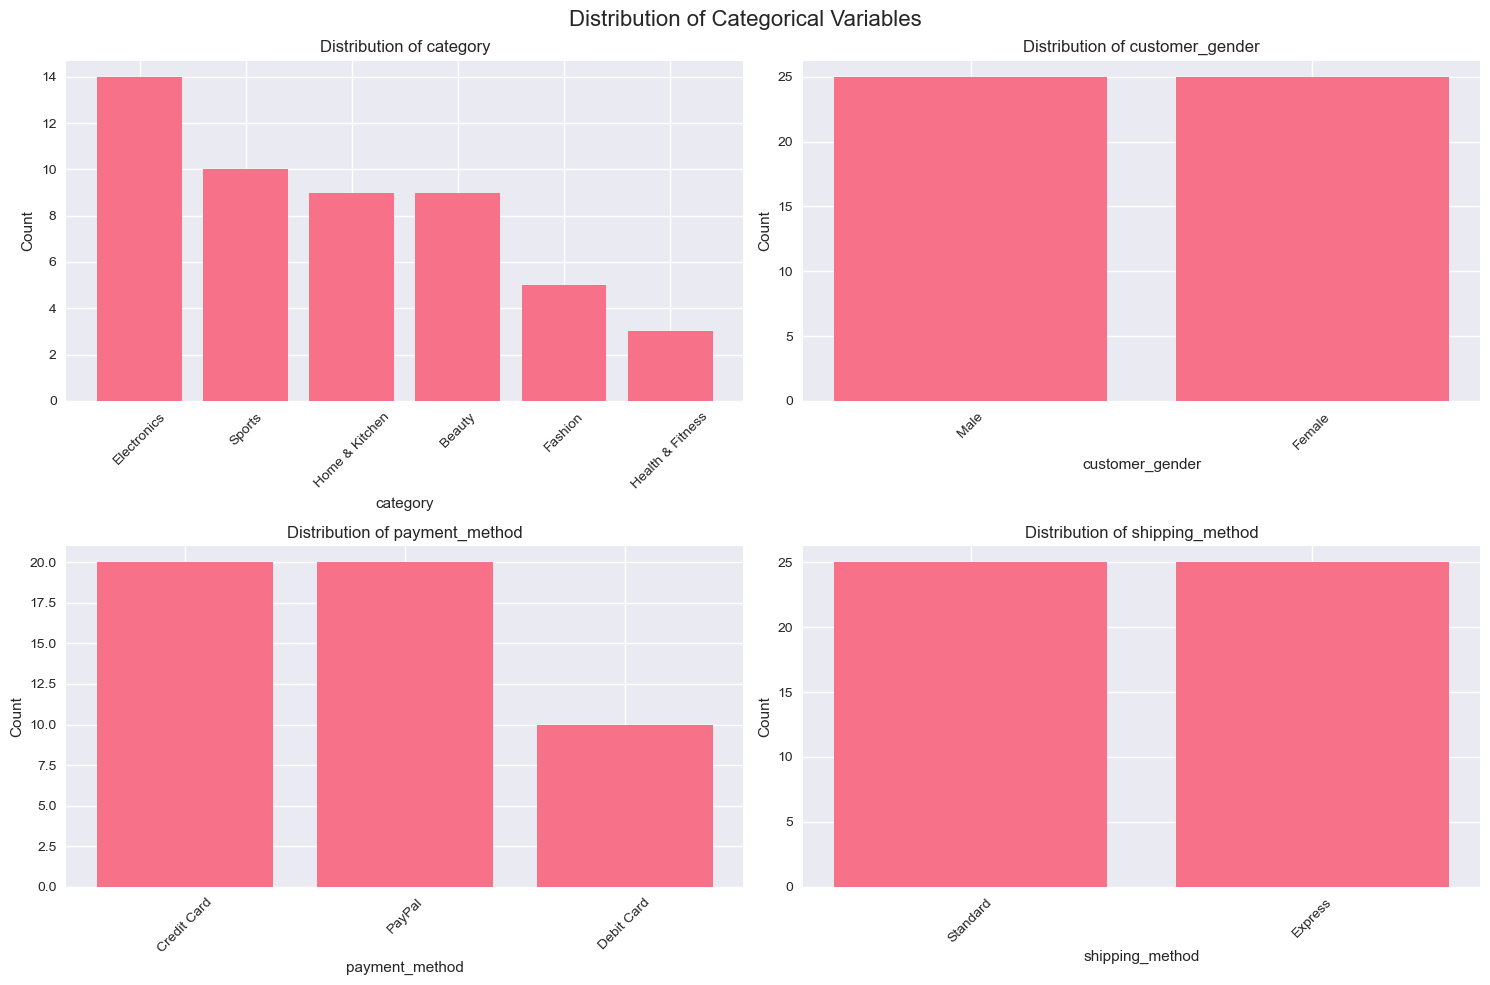

Categorical Variables Summary:

category:
category
Electronics         14
Sports              10
Home & Kitchen       9
Beauty               9
Fashion              5
Health & Fitness     3
Name: count, dtype: int64
Unique values: 6

customer_gender:
customer_gender
Male      25
Female    25
Name: count, dtype: int64
Unique values: 2

payment_method:
payment_method
Credit Card    20
PayPal         20
Debit Card     10
Name: count, dtype: int64
Unique values: 3

shipping_method:
shipping_method
Standard    25
Express     25
Name: count, dtype: int64
Unique values: 2


In [5]:
# Categorical variables analysis
categorical_vars = ['category', 'customer_gender', 'payment_method', 'shipping_method']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

for i, var in enumerate(categorical_vars):
    ax = axes[i//2, i%2]
    value_counts = df[var].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics for categorical variables
print("Categorical Variables Summary:")
for var in categorical_vars:
    print(f"\n{var}:")
    print(df[var].value_counts())
    print(f"Unique values: {df[var].nunique()}")

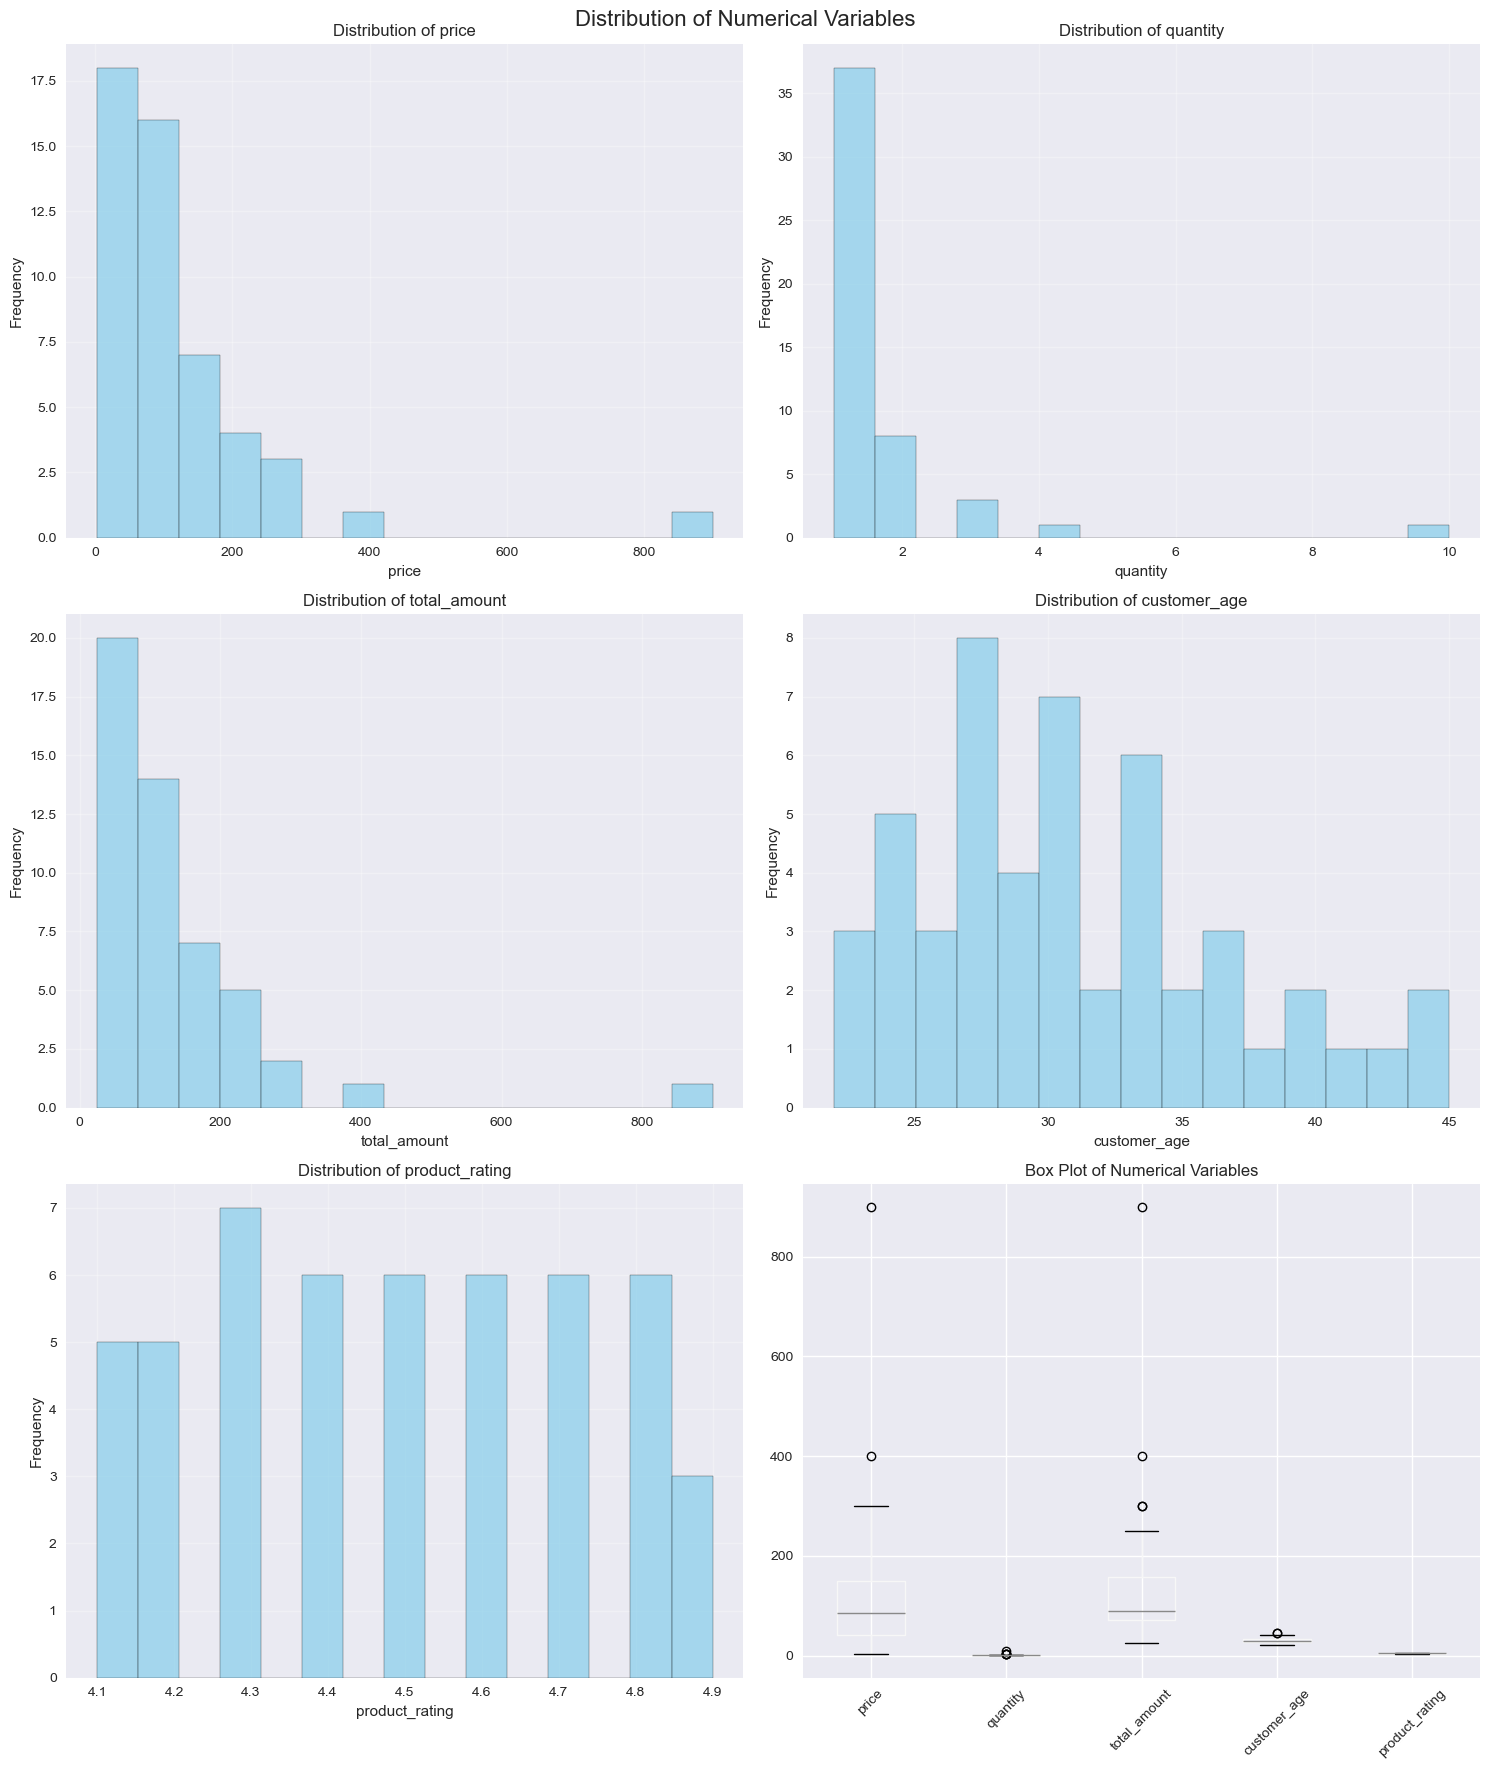

Numerical Variables Summary:
            price   quantity  total_amount  customer_age  product_rating
count   50.000000  50.000000     50.000000     50.000000       50.000000
mean   120.510000   1.520000    133.024800     31.060000        4.486000
std    139.709939   1.403203    134.979741      5.687114        0.243285
min      2.990000   1.000000     24.990000     22.000000        4.100000
25%     42.490000   1.000000     71.235000     27.000000        4.300000
50%     84.990000   1.000000     89.990000     30.000000        4.500000
75%    149.990000   1.750000    157.482500     34.000000        4.700000
max    899.990000  10.000000    899.990000     45.000000        4.900000

Skewness and Kurtosis:
price: Skewness = 3.884, Kurtosis = 19.755
quantity: Skewness = 4.851, Kurtosis = 27.905
total_amount: Skewness = 4.075, Kurtosis = 21.399
customer_age: Skewness = 0.668, Kurtosis = 0.015
product_rating: Skewness = 0.019, Kurtosis = -1.130


In [6]:
# Numerical variables analysis
numerical_vars = ['price', 'quantity', 'total_amount', 'customer_age', 'product_rating']

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, var in enumerate(numerical_vars):
    # Histogram
    ax1 = axes[i//2, i%2] if i < 4 else axes[2, 0]
    ax1.hist(df[var], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title(f'Distribution of {var}')
    ax1.set_xlabel(var)
    ax1.set_ylabel('Frequency')
    ax1.grid(True, alpha=0.3)

# Box plot for all numerical variables
ax2 = axes[2, 1]
df[numerical_vars].boxplot(ax=ax2)
ax2.set_title('Box Plot of Numerical Variables')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistical summary
print("Numerical Variables Summary:")
print(df[numerical_vars].describe())

# Skewness and kurtosis
print("\nSkewness and Kurtosis:")
for var in numerical_vars:
    skew = df[var].skew()
    kurt = df[var].kurtosis()
    print(f"{var}: Skewness = {skew:.3f}, Kurtosis = {kurt:.3f}")

## 4. Bivariate Analysis

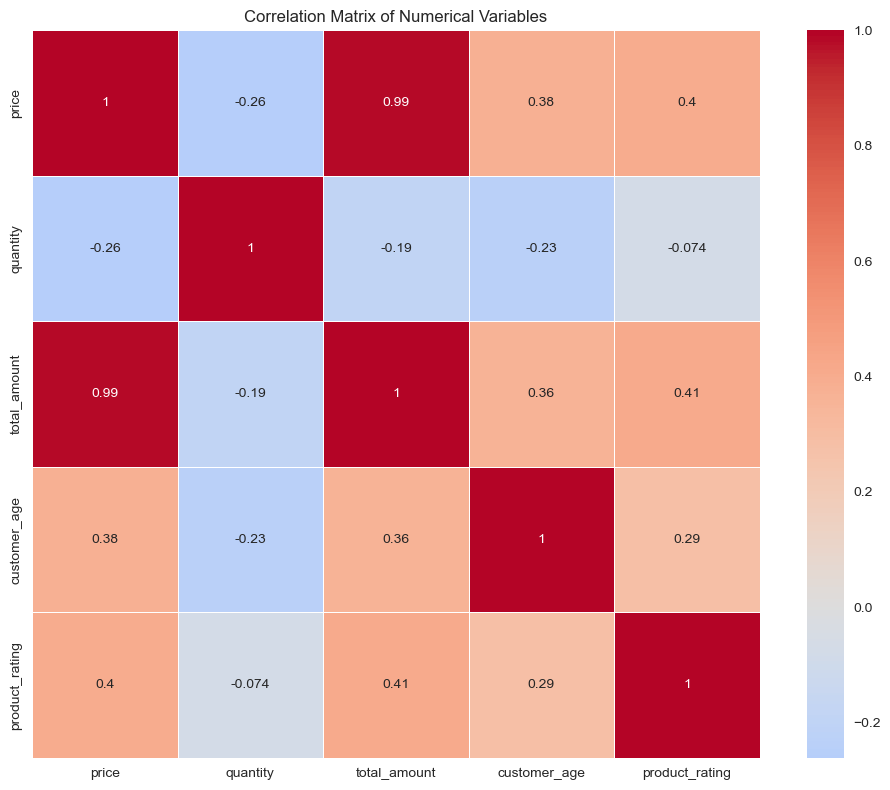

Correlation Matrix:
                   price  quantity  total_amount  customer_age  product_rating
price           1.000000 -0.261036      0.985552      0.381335        0.399623
quantity       -0.261036  1.000000     -0.188993     -0.231594       -0.073890
total_amount    0.985552 -0.188993      1.000000      0.363762        0.406093
customer_age    0.381335 -0.231594      0.363762      1.000000        0.285297
product_rating  0.399623 -0.073890      0.406093      0.285297        1.000000

Strong Correlations (|r| > 0.5):
price - total_amount: 0.986


In [7]:
# Correlation analysis
correlation_matrix = df[numerical_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print correlation values
print("Correlation Matrix:")
print(correlation_matrix)

# Strong correlations (threshold > 0.5)
print("\nStrong Correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_value:.3f}")

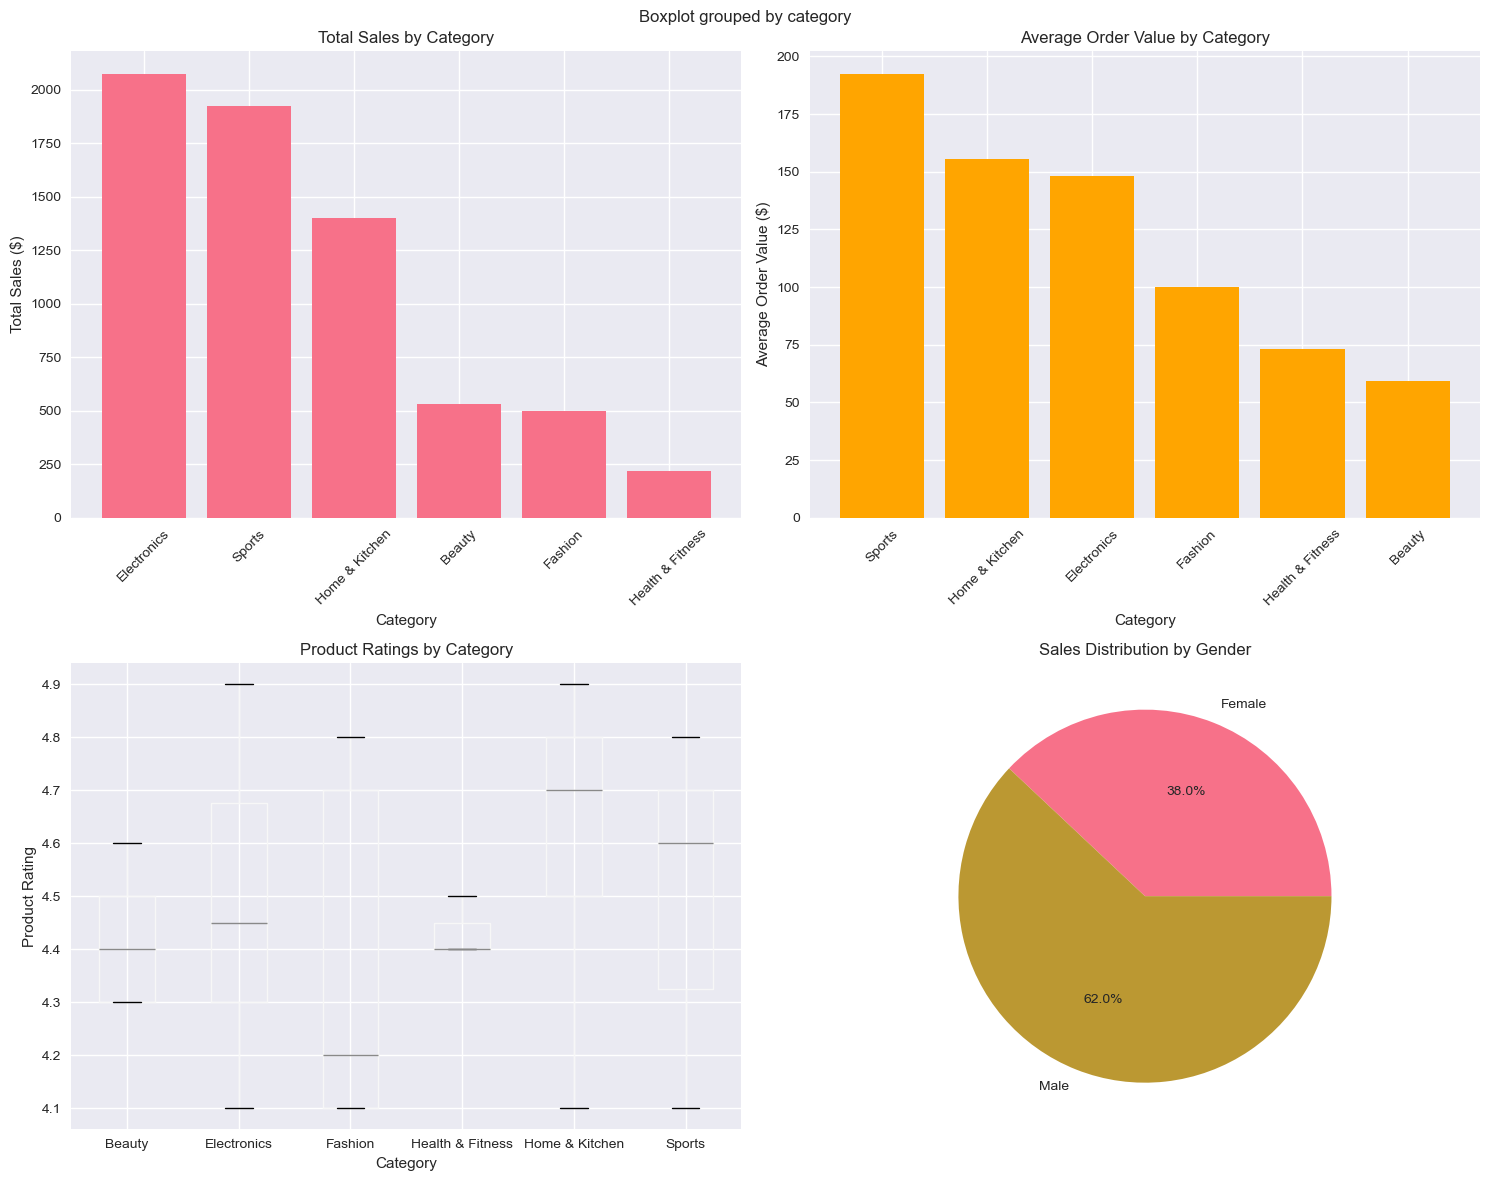

Category Performance:
                 total_amount               product_rating quantity
                          sum    mean count           mean      sum
category                                                           
Beauty                 531.84   59.09     9           4.43       16
Electronics           2074.83  148.20    14           4.48       17
Fashion                499.94   99.99     5           4.38        6
Health & Fitness       219.85   73.28     3           4.43       15
Home & Kitchen        1399.91  155.55     9           4.59        9
Sports                1924.87  192.49    10           4.52       13


In [8]:
# Category-based analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Sales Analysis by Category', fontsize=16)

# Sales by category
ax1 = axes[0, 0]
category_sales = df.groupby('category')['total_amount'].sum().sort_values(ascending=False)
ax1.bar(category_sales.index, category_sales.values)
ax1.set_title('Total Sales by Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Sales ($)')
ax1.tick_params(axis='x', rotation=45)

# Average order value by category
ax2 = axes[0, 1]
avg_order_value = df.groupby('category')['total_amount'].mean().sort_values(ascending=False)
ax2.bar(avg_order_value.index, avg_order_value.values, color='orange')
ax2.set_title('Average Order Value by Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Average Order Value ($)')
ax2.tick_params(axis='x', rotation=45)

# Product ratings by category
ax3 = axes[1, 0]
df.boxplot(column='product_rating', by='category', ax=ax3)
ax3.set_title('Product Ratings by Category')
ax3.set_xlabel('Category')
ax3.set_ylabel('Product Rating')

# Sales by gender
ax4 = axes[1, 1]
gender_sales = df.groupby('customer_gender')['total_amount'].sum()
ax4.pie(gender_sales.values, labels=gender_sales.index, autopct='%1.1f%%')
ax4.set_title('Sales Distribution by Gender')

plt.tight_layout()
plt.show()

# Print category statistics
print("Category Performance:")
category_stats = df.groupby('category').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'product_rating': 'mean',
    'quantity': 'sum'
}).round(2)
print(category_stats)

## 5. Time Series Analysis

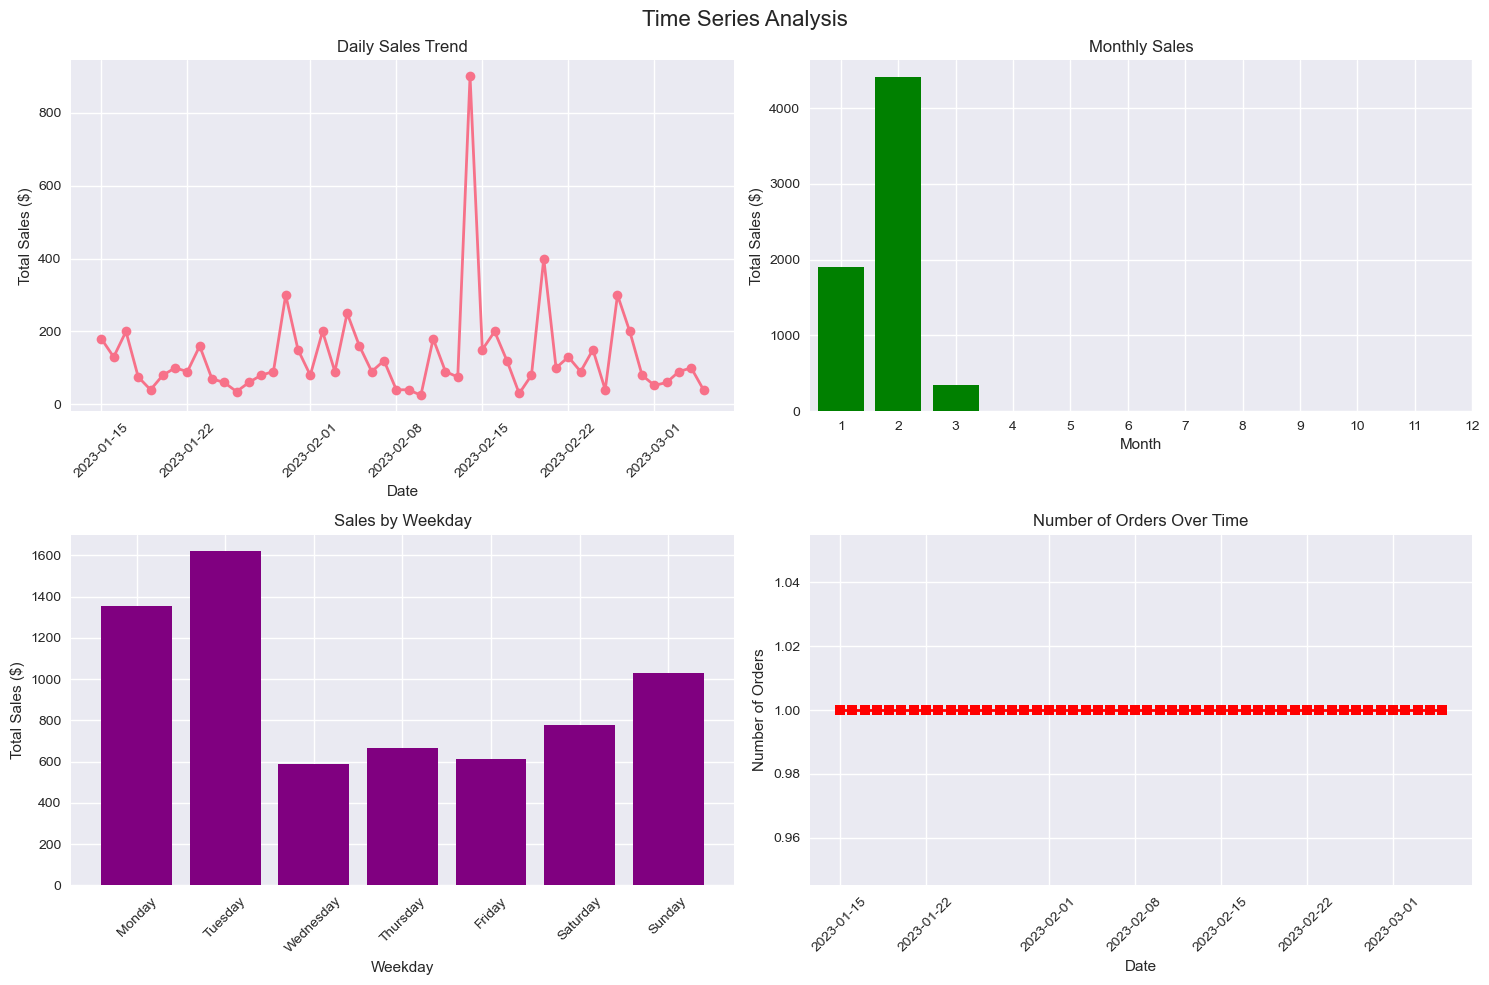

Time-based Statistics:
Total sales period: 2023-01-15 00:00:00 to 2023-03-05 00:00:00
Average daily sales: $133.02
Best sales day: 2023-02-14 00:00:00 ($899.99)
Worst sales day: 2023-02-10 00:00:00 ($24.99)
Most productive weekday: Tuesday ($1619.91)
Least productive weekday: Wednesday ($586.87)


In [9]:
# Time series analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Time Series Analysis', fontsize=16)

# Daily sales trend
ax1 = axes[0, 0]
daily_sales = df.groupby('order_date')['total_amount'].sum()
ax1.plot(daily_sales.index, daily_sales.values, marker='o', linewidth=2)
ax1.set_title('Daily Sales Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales ($)')
ax1.tick_params(axis='x', rotation=45)

# Monthly sales
ax2 = axes[0, 1]
monthly_sales = df.groupby('month')['total_amount'].sum()
ax2.bar(monthly_sales.index, monthly_sales.values, color='green')
ax2.set_title('Monthly Sales')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Sales ($)')
ax2.set_xticks(range(1, 13))

# Sales by weekday
ax3 = axes[1, 0]
weekday_sales = df.groupby('weekday')['total_amount'].sum()
# Order weekdays properly
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(weekday_order)
ax3.bar(weekday_sales.index, weekday_sales.values, color='purple')
ax3.set_title('Sales by Weekday')
ax3.set_xlabel('Weekday')
ax3.set_ylabel('Total Sales ($)')
ax3.tick_params(axis='x', rotation=45)

# Number of orders over time
ax4 = axes[1, 1]
daily_orders = df.groupby('order_date').size()
ax4.plot(daily_orders.index, daily_orders.values, marker='s', color='red', linewidth=2)
ax4.set_title('Number of Orders Over Time')
ax4.set_xlabel('Date')
ax4.set_ylabel('Number of Orders')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print time-based statistics
print("Time-based Statistics:")
print(f"Total sales period: {df['order_date'].min()} to {df['order_date'].max()}")
print(f"Average daily sales: ${daily_sales.mean():.2f}")
print(f"Best sales day: {daily_sales.idxmax()} (${daily_sales.max():.2f})")
print(f"Worst sales day: {daily_sales.idxmin()} (${daily_sales.min():.2f})")
print(f"Most productive weekday: {weekday_sales.idxmax()} (${weekday_sales.max():.2f})")
print(f"Least productive weekday: {weekday_sales.idxmin()} (${weekday_sales.min():.2f})")

## 6. Business Insights and Recommendations

In [10]:
# Key business metrics
total_revenue = df['total_amount'].sum()
total_orders = df.shape[0]
average_order_value = df['total_amount'].mean()
unique_customers = df['customer_id'].nunique()
customer_retention = (df['customer_id'].value_counts() > 1).sum()

print("=== KEY BUSINESS METRICS ===")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value: ${average_order_value:.2f}")
print(f"Unique Customers: {unique_customers:,}")
print(f"Repeat Customers: {customer_retention:,}")
print(f"Customer Retention Rate: {(customer_retention/unique_customers)*100:.1f}%")

# Top performers
print("\n=== TOP PERFORMERS ===")
print("Top 5 Products by Revenue:")
top_products = df.groupby('product_name')['total_amount'].sum().sort_values(ascending=False).head()
print(top_products)

print("\nTop 5 Customers by Spending:")
top_customers = df.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head()
print(top_customers)

print("\nTop 5 Sales Representatives:")
top_reps = df.groupby('sales_rep')['total_amount'].sum().sort_values(ascending=False).head()
print(top_reps)

# Regional analysis
print("\n=== REGIONAL ANALYSIS ===")
regional_stats = df.groupby('customer_location').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'customer_age': 'mean',
    'product_rating': 'mean'
}).round(2)
print(regional_stats.head(10))

# Payment method analysis
print("\n=== PAYMENT METHOD ANALYSIS ===")
payment_stats = df.groupby('payment_method').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'product_rating': 'mean'
}).round(2)
print(payment_stats)

=== KEY BUSINESS METRICS ===
Total Revenue: $6,651.24
Total Orders: 50
Average Order Value: $133.02
Unique Customers: 50
Repeat Customers: 0
Customer Retention Rate: 0.0%

=== TOP PERFORMERS ===
Top 5 Products by Revenue:
product_name
Treadmill         899.99
Gaming Console    399.99
Golf Clubs        299.99
Tablet            299.99
Smartwatch        249.99
Name: total_amount, dtype: float64

Top 5 Customers by Spending:
customer_id
C031    899.99
C037    399.99
C016    299.99
C043    299.99
C021    249.99
Name: total_amount, dtype: float64

Top 5 Sales Representatives:
sales_rep
Gregory Roberts    899.99
Jacob Edwards      399.99
Ashley Lewis       299.99
Liam Reed          299.99
Justin Wright      249.99
Name: total_amount, dtype: float64

=== REGIONAL ANALYSIS ===
                  total_amount               customer_age product_rating
                           sum    mean count         mean           mean
customer_location                                                       
Al